In [1]:
print('Ritu')

Ritu


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
car = pd.read_csv('../data/quikr_car.csv')
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
backup = car.copy()

In [5]:
car.shape

(892, 6)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
car['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

## Quality 

- name are pretty inconsistent
- year has many non - year values
- year is in object. Change to integen
- Price has Ask for Price
- Price has commas in its prices and dtype is objest
- campany has many name that are not any company like 'Used','I' and so on.
- kms_driven has dtype in object with kms at last
- fuel_type has nan values

In [8]:
car.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [9]:
car.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [10]:
car.company.unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

car.kms_driven.unique()

In [11]:
car.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

# Cleaning Data

#### Year has many non-year values and dtype is object

In [12]:
car = car[car.year.str.isnumeric()]


In [13]:
car.year = car.year.astype(int)

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


#### price has 'Ask for Price', commans, dtype in object

In [15]:
car = car[car.Price != 'Ask For Price']

In [16]:
car.Price = car.Price.str.replace(',','').astype(int)

In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


#### kms_driven has dtype in object with kms at last

In [18]:
car.kms_driven = car.kms_driven.str.split(' ').str.get(0).str.replace(',','')

In [19]:
car = car[car.kms_driven.str.isnumeric()]

In [20]:
car.kms_driven = car.kms_driven.astype(int)

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


#### fuel_type has nan values

In [22]:
car = car[~car.fuel_type.isna()]

#### name are pretty inconsistent

In [23]:
car.name = car.name.str.split().str.slice(0,3).str.join(' ')

In [24]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [25]:
car.company.unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

### Resetting the index of the final cleaned data

In [26]:
car = car.reset_index(drop = True)

In [27]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [28]:
car.describe(include = 'all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


### Removing outliers

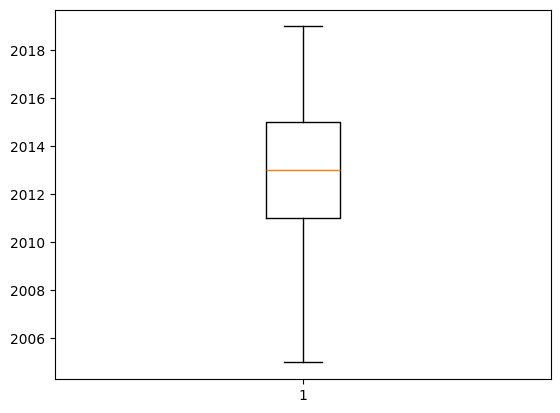

In [29]:
plt.boxplot(car[car.year>2004].year)
plt.show()

In [30]:
car = car[car.year>2004]

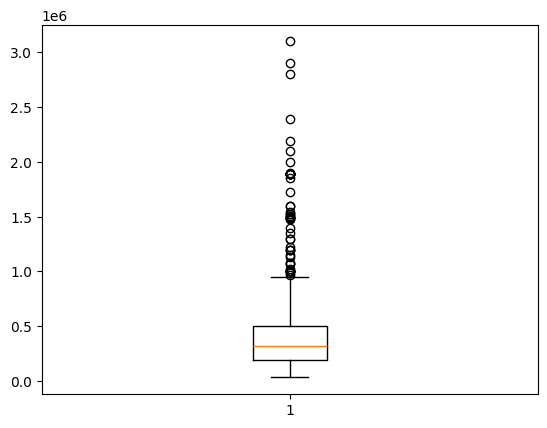

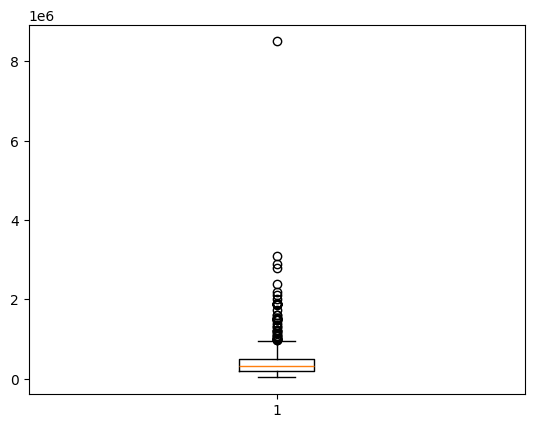

In [31]:
plt.boxplot(car[car['Price']<6e6].Price)
plt.show()
plt.boxplot(car.Price)
plt.show()

In [32]:
car[car.Price<4e6]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [33]:
car = car[car['Price']<7e5]

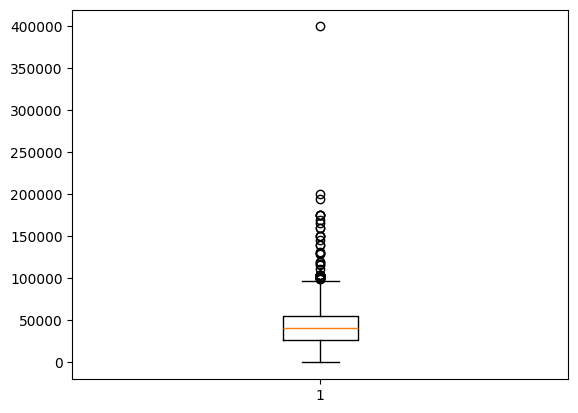

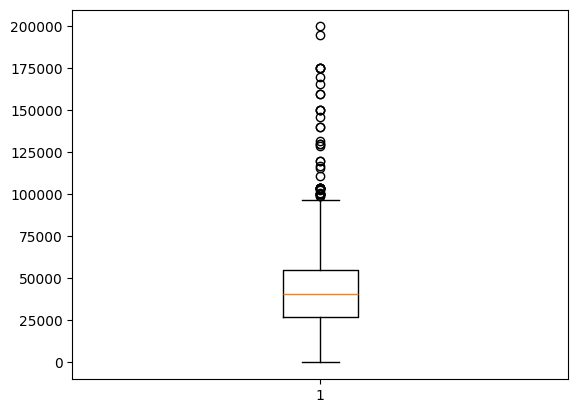

In [34]:
plt.boxplot(car.kms_driven)
plt.show()
plt.boxplot(car[car.kms_driven<=2e5].kms_driven)
plt.show()

In [35]:
car = car[car.kms_driven<=2e5]

In [36]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


### Extracting Training Data

In [37]:
X = car.drop('Price',axis =1 )
y = car.Price

In [38]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(541, 5)
(136, 5)
(541,)
(136,)


### Creating a column transformer to transform categorical columns using OheHotEncoder

In [39]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])
ohe.categories_

[array(['Audi A4 1.8', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
        'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
        'Chevrolet Beat LT', 'Chevrolet Beat PS', 'Chevrolet Cruze LTZ',
        'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2',
        'Chevrolet Sail UVA', 'Chevrolet Spark', 'Chevrolet Spark 1.0',
        'Chevrolet Spark LS', 'Chevrolet Spark LT', 'Chevrolet Tavera LS',
        'Chevrolet Tavera Neo', 'Datsun GO T', 'Datsun Go Plus',
        'Datsun Redi GO', 'Fiat Linea Emotion', 'Fiat Petra ELX',
        'Fiat Punto Emotion', 'Force Motors Force', 'Force Motors One',
        'Ford EcoSport', 'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo', 'Ford Figo Diesel',
        'Ford Figo Duratorq', 'Ford Figo Petrol', 'Ford Fusion 1.4',
        'Ford Ikon 1.3', 'Honda Accord', 'Honda Amaze', 'Honda Amaze 1.2',
        'Honda Amaze 1.5', 'Honda Brio', 'Honda Brio V', 'Honda Brio VX',


In [40]:
ctrf = ColumnTransformer( transformers = [
    ('ohe',OneHotEncoder(drop = 'first',categories = ohe.categories_),['name','company','fuel_type'])
],remainder = 'passthrough')

### Linear Regression Model

In [41]:
lr = LinearRegression()

### Making Pipeline

In [42]:
pipe = Pipeline(steps = [
    ('preprocessor',ctrf),
    ('regressor',lr)
])

### Fitting the model

In [43]:
pipe.fit(X_train,y_train)

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
       'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
       'Chevrolet Beat LT', 'Chevrolet Beat PS', 'Chevrolet Cruze LTZ',
       'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2',
       'Chevro...
       'Volkswagen Vento Highline', 'Volkswagen Vento Konekt'],
      dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Mitsubishi',
       'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                drop='first'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('regressor', LinearRegression())])

In [44]:
predict = pipe.predict(X_test)

### Checking R2 Score

In [45]:
r2_score(y_test,predict)

0.5998410129822076

### finding the good TrainTestSplit

In [46]:
scores = []
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr = LinearRegression()
    pipe = Pipeline(steps = [
        ('preprocessor',ctrf),
        ('regressor',lr)
    ])
    pipe.fit(X_train,y_train)
    predict = pipe.predict(X_test)
    scores.append(r2_score(y_test,predict))

In [47]:
max(scores)

0.8715202953656999

In [48]:
np.argmax(scores)

97

In [49]:
scores[np.argmax(scores)]

0.8715202953656999

### The best model  

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = np.argmax(scores))
lr = LinearRegression()
pipe = Pipeline(steps = [
    ('preprocessor',ctrf),
    ('regressor',lr)
])
pipe.fit(X_train,y_train)
predict = pipe.predict(X_test)
r2_score(y_test,predict)
                                                 

0.8715202953656999

In [51]:
import pickle

In [52]:
pickle.dump(pipe,open('RegressorModel.pkl','wb'))

In [53]:
car.loc[0]

name          Hyundai Santro Xing
company                   Hyundai
year                         2007
Price                       80000
kms_driven                  45000
fuel_type                  Petrol
Name: 0, dtype: object

In [54]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 677 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        677 non-null    object
 1   company     677 non-null    object
 2   year        677 non-null    int32 
 3   Price       677 non-null    int32 
 4   kms_driven  677 non-null    int32 
 5   fuel_type   677 non-null    object
dtypes: int32(3), object(3)
memory usage: 45.3+ KB


In [55]:
# pipe.predict([['Hyundai Santro Xing', 'Hyundai', 2007, 45000, 'Petrol']])
# pipe.predict(car.loc[0].drop('Price').values.reshape(1,5))
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Hyundai Santro Xing', 'Hyundai', 2007, 45000, 'Petrol']).reshape(1,5)))

array([65868.30990937])

In [56]:
pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)).shape

(1, 5)

In [57]:
car.to_csv('../data/cleaned_car.csv')

In [58]:
car.company.sort_values().unique()

array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Mitsubishi',
       'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen'],
      dtype=object)

In [70]:
name
for i in car.company.sort_values().unique():
    print('************Ritu company',i,'************')
    print(car[car['company'] == i]['name']) 

************Ritu company Audi ************
15         Audi Q7
221    Audi A4 1.8
236    Audi A4 1.8
Name: name, dtype: object
************Ritu company BMW ************
90     BMW 3 Series
546    BMW 5 Series
Name: name, dtype: object
************Ritu company Chevrolet ************
67        Chevrolet Spark LS
95         Chevrolet Beat LT
120          Chevrolet Spark
127           Chevrolet Beat
151       Chevrolet Spark LT
159        Chevrolet Beat LT
160        Chevrolet Beat LS
161        Chevrolet Beat LT
242     Chevrolet Tavera Neo
249      Chevrolet Enjoy 1.4
273        Chevrolet Beat LS
277        Chevrolet Beat LS
280        Chevrolet Beat LS
294     Chevrolet Tavera Neo
322       Chevrolet Sail UVA
349       Chevrolet Spark LT
368    Chevrolet Beat Diesel
404       Chevrolet Spark LS
413        Chevrolet Beat LS
522        Chevrolet Beat PS
531      Chevrolet Cruze LTZ
540      Chevrolet Spark 1.0
544          Chevrolet Enjoy
549        Chevrolet Beat LS
550      Chevrolet Cru

In [79]:
for i in car[car['company'] == 'Hyundai']['name']:
    print(i) 

Hyundai Santro Xing
Hyundai Grand i10
Hyundai Eon
Hyundai Elite i20
Hyundai Santro Xing
Hyundai i20 Sportz
Hyundai i20 Sportz
Hyundai i20 Sportz
Hyundai Eon
Hyundai i20 Magna
Hyundai Verna Transform
Hyundai Elite i20
Hyundai i10 Magna
Hyundai Verna Fluidic
Hyundai Grand i10
Hyundai i20 Asta
Hyundai i20 Sportz
Hyundai i20 Asta
Hyundai Elite i20
Hyundai i20 Sportz
Hyundai i10 Sportz
Hyundai Eon Era
Hyundai i20
Hyundai Fluidic Verna
Hyundai Santro Xing
Hyundai Grand i10
Hyundai i20 Active
Hyundai i20 Active
Hyundai Eon Sportz
Hyundai i20 Asta
Hyundai Grand i10
Hyundai Fluidic Verna
Hyundai Accent GLX
Hyundai Verna Fluidic
Hyundai Elite i20
Hyundai Verna Fluidic
Hyundai Elantra SX
Hyundai Grand i10
Hyundai i20 Active
Hyundai Grand i10
Hyundai i20
Hyundai Eon
Hyundai i10
Hyundai i20 Active
Hyundai Accent
Hyundai Verna
Hyundai i10 Sportz
Hyundai i10 Magna
Hyundai Verna 1.4
Hyundai Elite i20
Hyundai Santro Xing
Hyundai Sonata Transform
Hyundai Elite i20
Hyundai Grand i10
Hyundai Grand i10
Hyu

In [74]:
car.groupby('company')['name'].value_counts()

company     name                       
Audi        Audi A4 1.8                    2
            Audi Q7                        1
BMW         BMW 3 Series                   1
            BMW 5 Series                   1
Chevrolet   Chevrolet Beat LS              7
                                          ..
Volkswagen  Volkswagen Passat Diesel       1
            Volkswagen Polo Comfortline    1
            Volkswagen Polo Highline       1
            Volkswagen Polo Trendline      1
            Volkswagen Vento Highline      1
Name: count, Length: 213, dtype: int64

In [66]:
car.name.sort_values().unique()

array(['Audi A4 1.8', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
       'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
       'Chevrolet Beat LT', 'Chevrolet Beat PS', 'Chevrolet Cruze LTZ',
       'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2',
       'Chevrolet Sail UVA', 'Chevrolet Spark', 'Chevrolet Spark 1.0',
       'Chevrolet Spark LS', 'Chevrolet Spark LT', 'Chevrolet Tavera LS',
       'Chevrolet Tavera Neo', 'Datsun GO T', 'Datsun Go Plus',
       'Datsun Redi GO', 'Fiat Linea Emotion', 'Fiat Petra ELX',
       'Fiat Punto Emotion', 'Force Motors Force', 'Force Motors One',
       'Ford EcoSport', 'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo', 'Ford Figo Diesel',
       'Ford Figo Duratorq', 'Ford Figo Petrol', 'Ford Fusion 1.4',
       'Ford Ikon 1.3', 'Honda Accord', 'Honda Amaze', 'Honda Amaze 1.2',
       'Honda Amaze 1.5', 'Honda Brio', 'Honda Brio V', 'Honda Brio VX',
       'Honda 